In [3]:
# 엑셀파일 불러오기
import pandas as pd
raw_total = pd.read_excel('./files/jeju_restaurant.xlsx')
raw_total['tags'] [:3]

0    ['#산도롱맨도롱..', '#제주맛집', '#제주도맛집', '#서귀포맛집', '#월...
1    ['#굿베이크샵', '#전주카페추천', '#전주빵맛집', '#전주베이커리카페', '...
2    ['#Repost', '#점심메뉴', '#애월제주다', '#jmtgr', '#딱새우...
Name: tags, dtype: object

In [13]:
# 해시태그 통합 저장하기
tags_total = []
for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

tags_total[0:5]

['#산도롱맨도롱..', '#제주맛집', '#제주도맛집', '#서귀포맛집', '#월정리맛집']

In [6]:
# 빈도수 집계하기(Counter)
from collections import Counter
tag_counts = Counter(tags_total)

In [10]:
# 가장 많이 사용된 해시태그 살펴보기 
tag_counts.most_common(50)

[('#제주도맛집', 57),
 ('#제주맛집', 35),
 ('', 28),
 ('#애월맛집', 18),
 ('#제주도민맛집', 16),
 ('#제주살이', 15),
 ('#한림맛집', 13),
 ('#제주시맛집', 13),
 ('#제주도여행', 12),
 ('#제주도', 11),
 ('#서귀포맛집', 10),
 ('#협재맛집', 10),
 ('#제주가볼만한곳', 10),
 ('#제주맛집추천', 10),
 ('#제주핫플', 10),
 ('#제주여행', 10),
 ('#제주도맛집추천', 9),
 ('#애월아침식사', 9),
 ('#애월카페', 9),
 ('#제주현지인맛집', 9),
 ('#제주도카페', 9),
 ('#애월해안도로맛집', 8),
 ('#제주공항근처맛집', 7),
 ('#사이카레', 7),
 ('#제주여행추천', 7),
 ('#애월점심추천', 7),
 ('#협재해수욕장맛집', 7),
 ('#곽지해수욕장맛집', 7),
 ('#애월밥집', 7),
 ('#제주혼밥', 7),
 ('#애월혼밥', 7),
 ('#애월해안도로', 7),
 ('#애월가볼만한곳', 7),
 ('#애월데이트코스', 7),
 ('#제주서쪽맛집', 7),
 ('#제주카레맛집', 7),
 ('#제주데이트코스', 7),
 ('#jeju', 7),
 ('#제주카페', 7),
 ('#맛스타그램', 6),
 ('#먹스타그램', 6),
 ('#애월핫플', 5),
 ('#돔베라면', 5),
 ('#돔베덮밥', 5),
 ('#연동제주분식', 5),
 ('#제주타르트', 5),
 ('#일상', 5),
 ('#성산맛집', 4),
 ('#제주애월맛집', 4),
 ('#전복김밥', 4)]

In [11]:
# 데이터 정제하기
STOPWORDS = ['#일상', '#선팔', '#제주도', '#jeju', '#반영구', '#제주자연눈썹','#서귀포눈썹문신', '#제주눈썹문신', '#소통', '#맞팔']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(10)

[('#제주도맛집', 57),
 ('#제주맛집', 35),
 ('', 28),
 ('#애월맛집', 18),
 ('#제주도민맛집', 16),
 ('#제주살이', 15),
 ('#한림맛집', 13),
 ('#제주시맛집', 13),
 ('#제주도여행', 12),
 ('#서귀포맛집', 10)]

In [15]:
# 시각화 라이브러리 호출 및 환경 설정(한글 폰트)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)

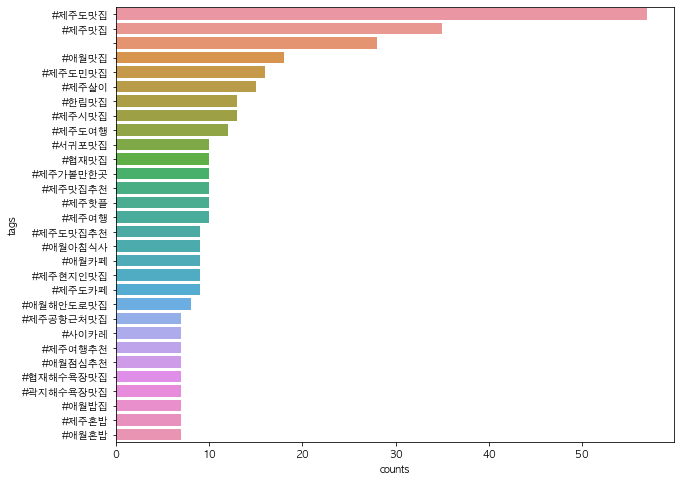

In [18]:
# 데이터 준비하기
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags', 'counts']
plt.figure(figsize=(10,8)) 
sns.barplot(x='counts', y='tags', data = tag_counts_df)

In [21]:
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
wordcloud=WordCloud(font_path= font_path, 
                    background_color="white",
                    max_words=100,
                    relative_scaling= 0.3,
                    width = 800,
                    height = 400
                 ).generate_from_frequencies(tag_counts_selected)  
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./files/3_2_tag-wordcloud.png')